<a href="https://colab.research.google.com/github/Poorna321288/Internship-assignments-/blob/main/MLP_Day_3_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Input features
X = np.array([[0,0], [0,1], [1,0], [1,1]])

# Target labels
y = np.array([[0], [1], [1], [0]])


In [ ]:
# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid for backpropagation
def sigmoid_derivative(x):
    return x * (1 - x)


In [ ]:
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        # Hidden layer
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = sigmoid(self.z1)
        # Output layer
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, output, lr):
        # Output error
        error = output - y
        d_output = error * sigmoid_derivative(output)

        # Hidden layer error
        error_hidden = d_output.dot(self.W2.T)
        d_hidden = error_hidden * sigmoid_derivative(self.a1)

        # Update weights and biases
        self.W2 -= self.a1.T.dot(d_output) * lr
        self.b2 -= np.sum(d_output, axis=0, keepdims=True) * lr
        self.W1 -= X.T.dot(d_hidden) * lr
        self.b1 -= np.sum(d_hidden, axis=0, keepdims=True) * lr

    def train(self, X, y, epochs=10000, lr=0.1):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output, lr)
            if epoch % 1000 == 0:
                loss = np.mean((output - y) ** 2)
                print(f"Epoch {epoch}, Loss: {loss:.4f}")


In [ ]:
# Initialize the model
mlp = MLP(input_size=2, hidden_size=4, output_size=1)

# Train it
mlp.train(X, y, epochs=10000, lr=0.1)


Epoch 0, Loss: 0.4195
Epoch 1000, Loss: 0.2302
Epoch 2000, Loss: 0.1700
Epoch 3000, Loss: 0.0812
Epoch 4000, Loss: 0.0209
Epoch 5000, Loss: 0.0095
Epoch 6000, Loss: 0.0057
Epoch 7000, Loss: 0.0039
Epoch 8000, Loss: 0.0029
Epoch 9000, Loss: 0.0023


In [ ]:
# Get predictions
preds = mlp.forward(X)
print("Predictions:\n", np.round(preds))


Predictions:
 [[0.]
 [1.]
 [1.]
 [0.]]


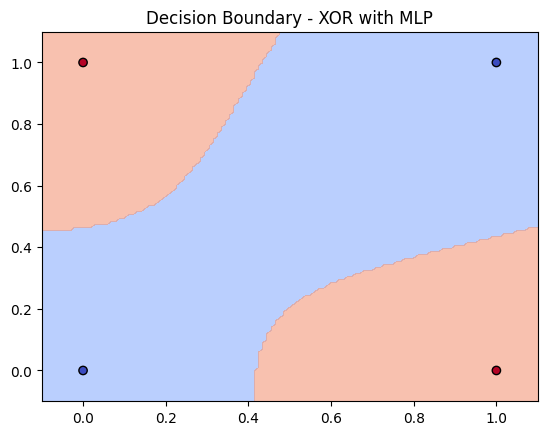

In [ ]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.forward(grid).reshape(xx.shape)

    plt.contourf(xx, yy, probs > 0.5, cmap=plt.cm.coolwarm, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title("Decision Boundary - XOR with MLP")
    plt.show()

plot_decision_boundary(mlp, X, y)
